In [69]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('temperatures.csv', decimal=",")

In [3]:
raw_data.head()

,Temp_chambre,Temp_Lyon,Ouverture,Heure,Temp_1H
0,24.125,23.075,0,0,-0.125
1,24.025,22.575,0,3600,-0.100
2,23.900,22.150,0,7200,-0.050
3,23.800,21.825,0,10800,-0.125
4,23.750,21.625,0,14400,-0.250


In [4]:
X = raw_data.values[:,range(0,4)]
y = raw_data.values[:,4]

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8)

In [6]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((589, 4), (148, 4), (589,), (148,))

In [7]:
ones = np.ones(raw_data.shape[0])
x = np.matrix([ones,raw_data['Temp_chambre'],raw_data['Temp_Lyon'],raw_data['Ouverture'],raw_data['Heure']]).T
y = raw_data['Temp_1H'].T
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
Xtest.shape,ytest.shape,ytest.reshape(ytest.shape[0],1).shape
result = np.concatenate((Xtest,ytest.reshape(ytest.shape[0],1)),axis=1)

In [61]:
regr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

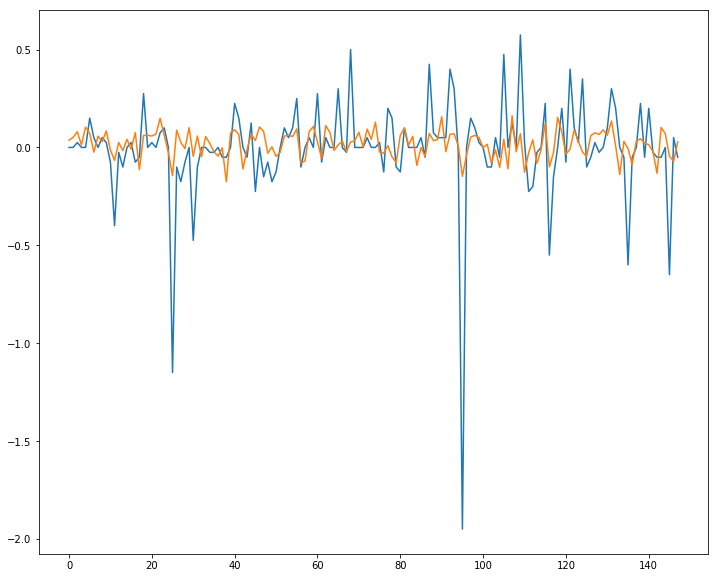

In [75]:
plt.rcParams["figure.figsize"] = [12.0,10.0]
plt.plot(ytest)
plt.plot(regr.predict(Xtest))